### Component of Exploratory Data analysis


1. Data Wrangling
    * Numpy
    * Pandas
    
2. Data Visualisation
    * matplotlib
    * seaborn
    * plotly
    
3. Statistical analysis/ hypothesis testing
    * scipy.stats
    * statsmodel

In [2]:
import pandas as pd
import numpy as np

#### creating dataframes in pandas 

1. from dictonary
2. from list of lists
3. loading a local file

In [3]:
# create dataframe from dictionaries 

# create dataframe of club and players

data_dict = {
    
    'club':['Man utd','Arsenal','Chelsea','Barcelona','City','Madrid'],
    'best player': ['Bruno','Saka','Enzo','Araujo','KDB','Vini Jnr'],
    'country': ['Portugal','England','Argentina','Uruguay',
               'Belgium','Brazil'],
    'no_ucl': [3,0,2,5,1,14]
    
}

data = pd.DataFrame(data_dict)

In [4]:
data

,club,best player,country,no_ucl
0,Man utd,Bruno,Portugal,3
1,Arsenal,Saka,England,0
2,Chelsea,Enzo,Argentina,2
3,Barcelona,Araujo,Uruguay,5
4,City,KDB,Belgium,1
5,Madrid,Vini Jnr,Brazil,14


In [5]:
# create dataframe from list of lists

# create a dataframe of NIgerian states

data_list = [
    ['Oyo','Ibadan','South','12','pdp'],
    ['Lagos','Ikeja','South','22','apc'],
    ['Osun','Osogbo','South','15','pdp'],
    ['Kano','Kano','North','20','apc'],
    ['Jigawa','Dutse','North','11','pdp'],
    ['Kwara','Ilorin','Central','14','apc']
]

col_names = ['state','capital','region','state_score','ruling_party']

state_data = pd.DataFrame(data = data_list, columns = col_names)

state_data


,state,capital,region,state_score,ruling_party
0,Oyo,Ibadan,South,12,pdp
1,Lagos,Ikeja,South,22,apc
2,Osun,Osogbo,South,15,pdp
3,Kano,Kano,North,20,apc
4,Jigawa,Dutse,North,11,pdp
5,Kwara,Ilorin,Central,14,apc


In [6]:
# loading data from the local file

order_data = pd.read_csv(r'C:\Users\hp\Documents\order_details.csv')

In [7]:
order_data

,OrderID,ProductID,UnitPrice,Quantity,Discount
0,10248,11,14.00,12,0
1,10248,42,9.80,10,0
2,10248,72,34.80,5,0
3,10249,14,18.60,9,0
4,10249,51,42.40,40,0
...,...,...,...,...,...
995,10624,29,123.79,6,0
996,10624,44,19.45,10,0
997,10625,14,23.25,3,0
998,10625,42,14.00,5,0


In [8]:
# create a dataframe of appclick students using dictionary method
# the dataframe is going to have columns name,age,course,state


# create a dataframe of your choice using list of lists

# load in the products table from sql by firstly downloading it to your local
# machine

## Connecting to a Mysql Database

In [9]:
import mysql.connector
from mysql.connector import Error

import pandas as pd
import numpy as np

In [10]:
from IPython.display import clear_output

In [11]:
# create a function for connecting to the server


def connect_server(host_name, user_name, password):
    connection = None
    try:
        connection = mysql.connector.connect(
            host = host_name,
            user = user_name,
            passwd = password
        )
        print(f'Connected to Mysql server successfully via {host_name}')
        return connection
    except Error as err:
        print(f'Error: {err}')

pw = input()
clear_output()

connection = connect_server(host_name = 'localhost', user_name = 'root', password = pw)

Connected to Mysql server successfully via localhost


In [12]:
# establishin database connection

def db_connect(hostname, username, db_name, password):
    connection = None
    try:
        connection = mysql.connector.connect(
            host = hostname,
            user = username,
            database = db_name,
            passwd = password
        )
        print(f'Connected to database {db_name} successfully')
        return connection
    except Error as err:
        print(f'Error:{err}')
    
connection = db_connect(hostname = 'localhost', username = 'root',db_name = 'northwind', password = pw)

Connected to database northwind successfully


In [13]:
# create a read query function

def read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as err:
        print(f'Error: {err}')
    
query_1 = '''

select od.orderid, p.productname,p.unitprice, od.quantity
from `order details` od
join products p on p.productid = od.productid
'''    

data = read_query(connection = connection, query = query_1)

In [14]:
# converting the list of tuple into a list of lists



data_list = []

for row in data:
    row = list(row)
    data_list.append(row)


In [15]:
# convert it into a dataframe

columns = ['orderid','product','price','quantity']

data_df = pd.DataFrame(data_list, columns = columns)

In [16]:
data_df

,orderid,product,price,quantity
0,10285,Chai,18.0000,45
1,10294,Chai,18.0000,18
2,10317,Chai,18.0000,20
3,10348,Chai,18.0000,15
4,10354,Chai,18.0000,12
...,...,...,...,...
2150,11000,Original Frankfurter grne Soe,13.0000,30
2151,11015,Original Frankfurter grne Soe,13.0000,18
2152,11060,Original Frankfurter grne Soe,13.0000,10
2153,11068,Original Frankfurter grne Soe,13.0000,28


In [17]:
query_2 = '''


select o.orderid,o.shipcountry,o.shippeddate,s.companyname,c.companyname,
    od.unitprice,od.quantity,o.requireddate,concat(e.firstname,' ',e.lastname) as fullname
from `order details` od
join orders o on o.orderid = od.orderid
join employees e on e.employeeid = o.employeeid
join shippers s on s.shipperid = o.shipvia
join customers c on c.customerid = o.customerid;


'''

data = read_query(connection = connection, query = query_2)

data_list = []

for row in data:
    row = list(row)
    data_list.append(row)
    

columns = ['id','country','shipeddate','shipper','customer','price','quantity','requireddate','employee']   
    
orders_df = pd.DataFrame(data_list, columns = columns)


### DATA WRANGLING WITH NUMPY AND PANDAS 

In [18]:
# check the top records with .head() method

orders_df.head()

,id,country,shipeddate,shipper,customer,price,quantity,requireddate,employee
0,10293,Mexico,1996-09-11,Federal Shipping,Tortuga Restaurante,50.0000,12,1996-09-26,Nancy Davolio
1,10293,Mexico,1996-09-11,Federal Shipping,Tortuga Restaurante,3.6000,10,1996-09-26,Nancy Davolio
2,10293,Mexico,1996-09-11,Federal Shipping,Tortuga Restaurante,35.1000,5,1996-09-26,Nancy Davolio
3,10293,Mexico,1996-09-11,Federal Shipping,Tortuga Restaurante,6.2000,6,1996-09-26,Nancy Davolio
4,10306,Spain,1996-09-23,Federal Shipping,Romero y tomillo,20.7000,10,1996-10-14,Nancy Davolio


In [19]:
# check the bottom records with .tail method

orders_df.tail()

,id,country,shipeddate,shipper,customer,price,quantity,requireddate,employee
2150,10829,UK,1998-01-23,Speedy Express,Island Trading,19.0000,10,1998-02-10,Anne Dodsworth
2151,10829,UK,1998-01-23,Speedy Express,Island Trading,40.0000,20,1998-02-10,Anne Dodsworth
2152,10829,UK,1998-01-23,Speedy Express,Island Trading,6.0000,10,1998-02-10,Anne Dodsworth
2153,10829,UK,1998-01-23,Speedy Express,Island Trading,34.0000,21,1998-02-10,Anne Dodsworth
2154,10970,Spain,1998-04-24,Speedy Express,Blido Comidas preparadas,7.0000,40,1998-04-07,Anne Dodsworth


In [20]:
# .shape to return the dimension of dataframe 

f'There are {orders_df.shape[0]} rows and {orders_df.shape[1]} columns'

'There are 2155 rows and 9 columns'

In [21]:
# .columns method for returning the list of column names 

orders_df.columns

Index(['id', 'country', 'shipeddate', 'shipper', 'customer', 'price',
       'quantity', 'requireddate', 'employee'],
      dtype='object')

In [22]:
# .info to return the data type, null values and other important description

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            2155 non-null   int64         
 1   country       2155 non-null   object        
 2   shipeddate    2082 non-null   datetime64[ns]
 3   shipper       2155 non-null   object        
 4   customer      2155 non-null   object        
 5   price         2155 non-null   object        
 6   quantity      2155 non-null   int64         
 7   requireddate  2155 non-null   datetime64[ns]
 8   employee      2155 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(5)
memory usage: 151.7+ KB


In [23]:
# .isna for inspecting missing values

orders_df.isnull().sum()

id               0
country          0
shipeddate      73
shipper          0
customer         0
price            0
quantity         0
requireddate     0
employee         0
dtype: int64

In [24]:
# handle missing values with dropna

orders_df.dropna(inplace = True)
orders_df.isnull().sum()

id              0
country         0
shipeddate      0
shipper         0
customer        0
price           0
quantity        0
requireddate    0
employee        0
dtype: int64

In [25]:
# correcting index imbalance with .reset_index method

orders_df.reset_index(drop = True, inplace = True)

In [26]:
# handling the price data type 

orders_df['price'] = orders_df['price'].apply(pd.to_numeric)

In [27]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2082 entries, 0 to 2081
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            2082 non-null   int64         
 1   country       2082 non-null   object        
 2   shipeddate    2082 non-null   datetime64[ns]
 3   shipper       2082 non-null   object        
 4   customer      2082 non-null   object        
 5   price         2082 non-null   float64       
 6   quantity      2082 non-null   int64         
 7   requireddate  2082 non-null   datetime64[ns]
 8   employee      2082 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(4)
memory usage: 146.5+ KB


In [28]:
# create order value column

orders_df['order value'] = orders_df['price'] * orders_df['quantity']

In [29]:
# .apply method for using a function on a dataframe or a series


def price_class(num):
    if num <= 50:
        return 'low'
    elif num <= 100:
        return 'mid'
    elif num <= 150:
        return 'high'
    else:
        return 'luxury'
    

orders_df['price class'] = orders_df['price'].apply(price_class)

In [30]:
# .value_counts method for counting the number of element in each category in a column

orders_df['price class'].value_counts(ascending = True)

high        22
luxury      24
mid        115
low       1921
Name: price class, dtype: int64

In [31]:
# .unique and .nuique for categorical column inspection

orders_df['employee'].unique()

array(['Nancy Davolio', 'Andrew Fuller', 'Janet Leverling',
       'Margaret Peacock', 'Steven Buchanan', 'Michael Suyama',
       'Robert King', 'Laura Callahan', 'Anne Dodsworth'], dtype=object)

In [32]:
# generate waiting days column

def clean_days(num):
    if num <= 0:
        return 0
    else:
        return num

orders_df['waiting days'] = (orders_df['shipeddate'] - 
                             orders_df['requireddate'])/np.timedelta64(1, 'D')

orders_df['waiting days'] = orders_df['waiting days'].apply(clean_days)


In [33]:
orders_df[orders_df['waiting days'] > 0]

,id,country,shipeddate,shipper,customer,price,quantity,requireddate,employee,order value,price class,waiting days
62,10709,Brazil,1997-11-20,Federal Shipping,Gourmet Lanchonetes,40.0,40,1997-11-14,Nancy Davolio,1600.0,low,6.0
63,10709,Brazil,1997-11-20,Federal Shipping,Gourmet Lanchonetes,53.0,28,1997-11-14,Nancy Davolio,1484.0,mid,6.0
64,10709,Brazil,1997-11-20,Federal Shipping,Gourmet Lanchonetes,34.0,10,1997-11-14,Nancy Davolio,340.0,low,6.0
192,10827,France,1998-02-06,United Package,Bon app',31.0,15,1998-01-26,Nancy Davolio,465.0,low,11.0
193,10827,France,1998-02-06,United Package,Bon app',18.0,21,1998-01-26,Nancy Davolio,378.0,low,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022,10705,Venezuela,1997-11-18,United Package,HILARION-Abastos,12.5,20,1997-11-12,Anne Dodsworth,250.0,low,6.0
2023,10705,Venezuela,1997-11-18,United Package,HILARION-Abastos,32.0,4,1997-11-12,Anne Dodsworth,128.0,low,6.0
2075,10828,Argentina,1998-02-04,Speedy Express,Rancho grande,81.0,5,1998-01-27,Anne Dodsworth,405.0,mid,8.0
2076,10828,Argentina,1998-02-04,Speedy Express,Rancho grande,263.5,2,1998-01-27,Anne Dodsworth,527.0,luxury,8.0


In [34]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2082 entries, 0 to 2081
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            2082 non-null   int64         
 1   country       2082 non-null   object        
 2   shipeddate    2082 non-null   datetime64[ns]
 3   shipper       2082 non-null   object        
 4   customer      2082 non-null   object        
 5   price         2082 non-null   float64       
 6   quantity      2082 non-null   int64         
 7   requireddate  2082 non-null   datetime64[ns]
 8   employee      2082 non-null   object        
 9   order value   2082 non-null   float64       
 10  price class   2082 non-null   object        
 11  waiting days  2082 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(5)
memory usage: 195.3+ KB


In [35]:
orders_df.astype({'id': 'str'}).dtypes

id                      object
country                 object
shipeddate      datetime64[ns]
shipper                 object
customer                object
price                  float64
quantity                 int64
requireddate    datetime64[ns]
employee                object
order value            float64
price class             object
waiting days           float64
dtype: object

### column generation

In [36]:
# conditional colums using list comprehension


orders_df['delivery_class'] = ['early' if x <= 0 else 'late' for x in orders_df['waiting days']]

In [37]:
orders_df['delivery_class'].value_counts()

early    1990
late       92
Name: delivery_class, dtype: int64

In [38]:
# deduct a tax return of 4% from each of the order values 


# method 1

orders_df['net_sales'] = orders_df['order value'] * 0.96

# method 2 

orders_df['net_sales'] = [x*0.96 for x in orders_df['order value']]

# method 3

def tax(num):
    value = num * 0.96
    return value

orders_df['net_sales'] = orders_df['order value'].apply(tax)


In [39]:
# cross tabulation 

employee_price_cross = pd.crosstab(orders_df['employee'],orders_df['price class'], margins = True)
employee_price_cross

price class,high,low,luxury,mid,All
employee,,,,,
Andrew Fuller,5,211,4,12,232
Anne Dodsworth,2,89,3,10,104
Janet Leverling,3,298,5,15,321
Laura Callahan,2,234,0,14,250
Margaret Peacock,4,377,6,22,409
Michael Suyama,2,154,0,8,164
Nancy Davolio,1,292,3,18,314
Robert King,3,157,2,9,171
Steven Buchanan,0,109,1,7,117


In [40]:
ship_delivery_cross = pd.crosstab(orders_df['shipper'],
                                  orders_df['delivery_class'], margins = True)

ship_delivery_cross['late_percentage'] = (ship_delivery_cross['late']/ship_delivery_cross['All'])*100
ship_delivery_cross

delivery_class,early,late,All,late_percentage
shipper,,,,
Federal Shipping,609,25,634,3.943218
Speedy Express,605,31,636,4.874214
United Package,776,36,812,4.433498
All,1990,92,2082,4.418828


In [41]:
orders_df[['employee','order value']].groupby(by = ['employee']).mean()

,order value
employee,
Andrew Fuller,748.869655
Anne Dodsworth,789.480769
Janet Leverling,663.711215
Laura Callahan,519.090680
Margaret Peacock,593.384963
Michael Suyama,468.369512
Nancy Davolio,627.927102
Robert King,795.925088
Steven Buchanan,645.878205


## Data Visualization

In [42]:
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

In [43]:
# customize the sns and plt charts

sns.set_style('darkgrid')
sns.set_palette('husl')


plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10,6)


Text(0, 0.5, 'Names of Employees')

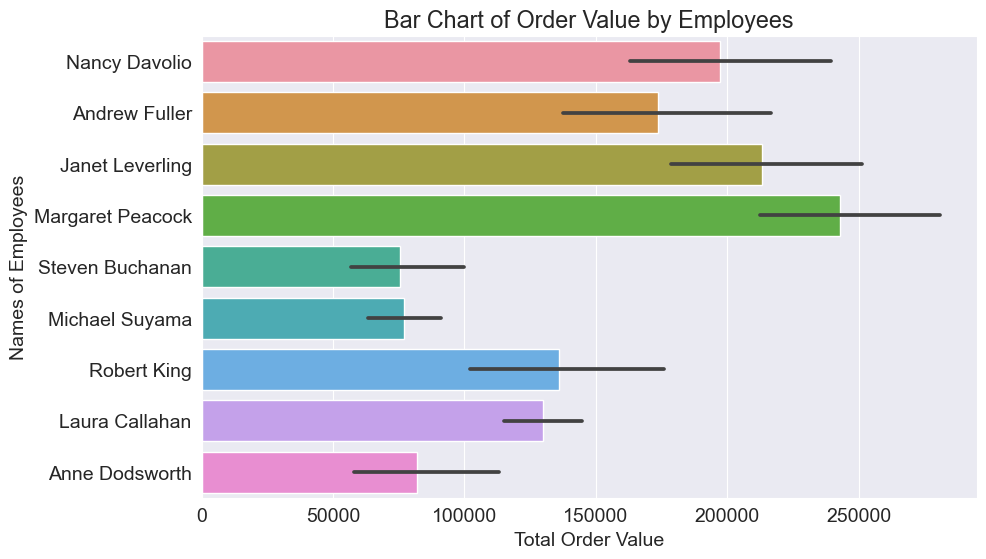

In [44]:
# bar chart in seaborn

sns.barplot(data = orders_df, y = 'employee', x = 'order value',estimator = 'sum')
plt.title('Bar Chart of Order Value by Employees')
plt.xlabel('Total Order Value')
plt.ylabel('Names of Employees')

In [45]:
# barchart in plotly


px.histogram(data_frame = orders_df, y = 'employee', x = 'order value',
        title = 'BAR CHART OF ORDER VALUE BY EMPLOYEES',color = 'shipper',
             color_discrete_map = {
                 
                 'Federal Shipping': 'red',
                 'Speedy Express': 'blue',
                 'United Package': 'green'   
             }, barmode = 'group')

Text(0, 0.5, 'Total Sales')

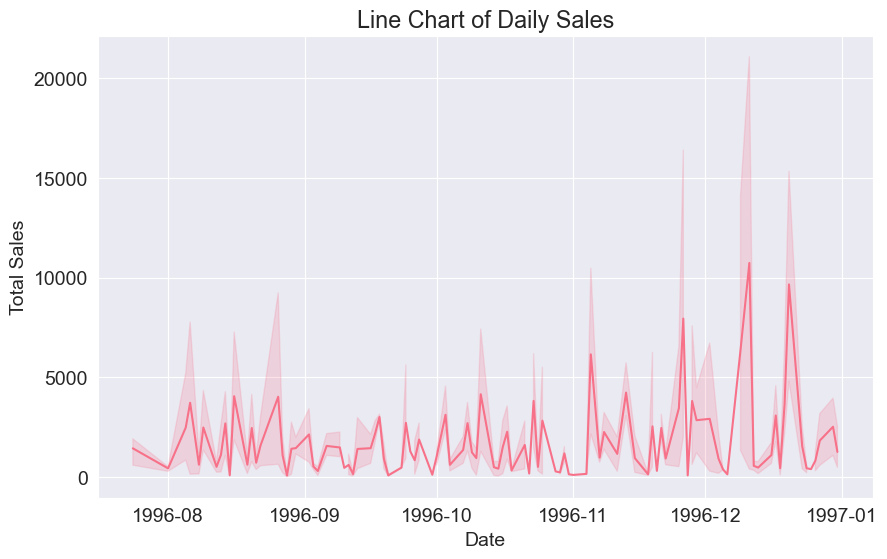

In [46]:
# line charts using seaborn

sns.lineplot(data = orders_df[orders_df['requireddate'] < '1997-01-01'], 
             x = 'requireddate', y = 'order value', estimator = 'sum')
plt.title('Line Chart of Daily Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')

In [47]:
data_1996 = orders_df[orders_df['requireddate'] < '1997-01-01']
data_1996 = data_1996[ ['requireddate', 'order value']].groupby(['requireddate']).sum()
data_1996.reset_index(inplace = True)
px.line(data_frame = data_1996,  
        x = 'requireddate', y = 'order value', color_discrete_sequence = ['red'],
       title = 'Line Chart of Daily Sales')

Text(0.5, 1.0, 'Distribution of Quantity')

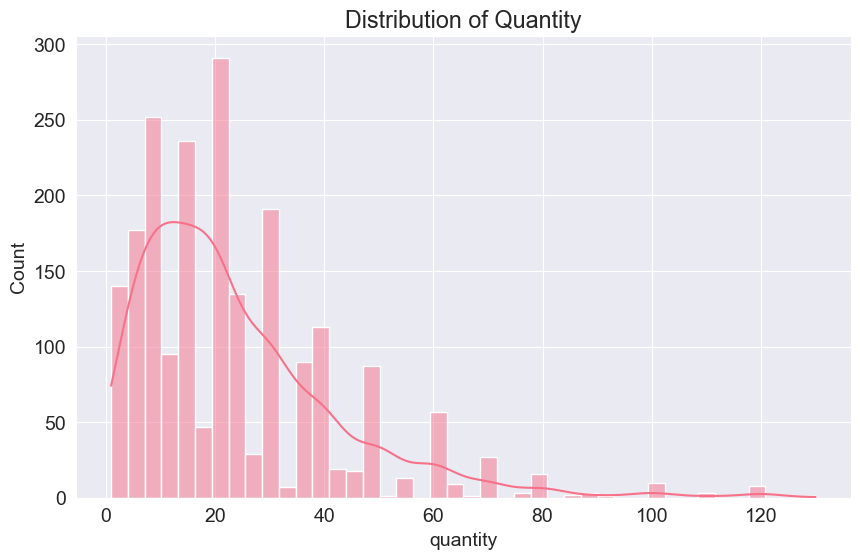

In [48]:
# histogram

sns.histplot(data = orders_df, x = 'quantity', kde = True)
plt.title('Distribution of Quantity')

In [49]:
px.histogram(data_frame = orders_df, x = 'quantity',
            title = 'DISTRIBUTION OF QUANTITY',marginal = 'box')

<Axes: xlabel='quantity'>

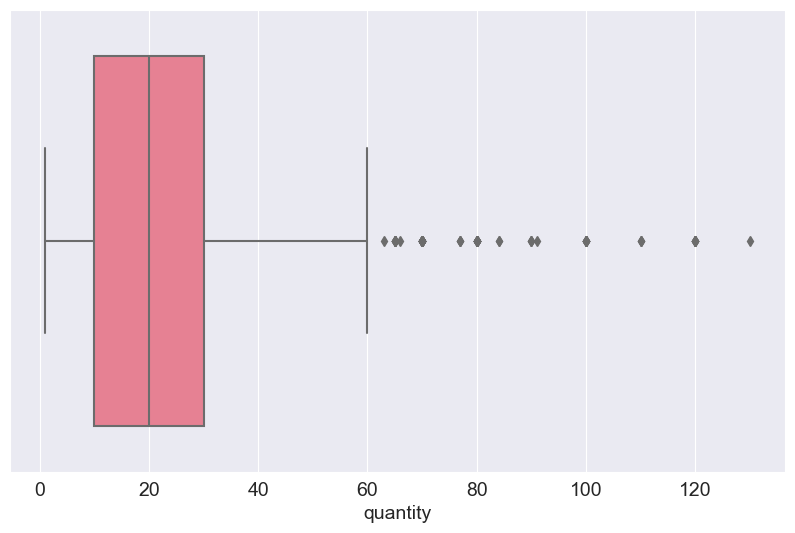

In [50]:
# box plot

sns.boxplot(data = orders_df, x = 'quantity')

In [51]:
# boxplot in plotly


px.box(data_frame = orders_df, x = 'quantity', title = 'Quantity Distribution',
      color_discrete_sequence = ['darkred'])

<Axes: xlabel='quantity', ylabel='order value'>

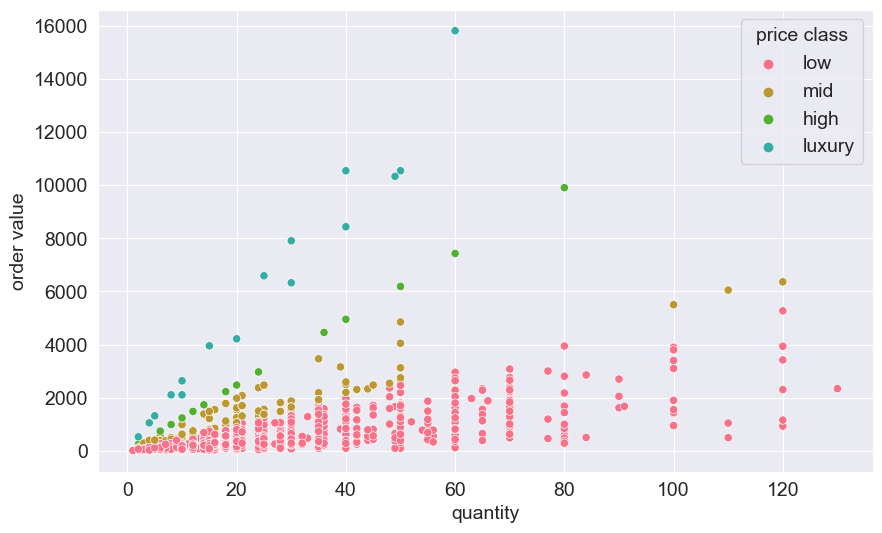

In [52]:
#  Scatter Charts

sns.scatterplot(data = orders_df, x = 'quantity', y = 'order value',
               hue = 'price class')

In [53]:
px.scatter(data_frame = orders_df, x = 'quantity', y = 'order value',
          color = 'price class', title = 'SCATTER  PLOT OF QUANTITY VS VALUE')

### subplots 

In [54]:
# plotly suplots

px.box(data_frame = orders_df, y = 'quantity',
      color = 'shipper', facet_col = 'shipper', 
       title = 'SUBPLOTS OF WAITING DAYS DISTRIBUTION BY SHIPPERS')

Text(0.5, 0.98, 'CHART OF EMPLOYEE PERFORMANCE')

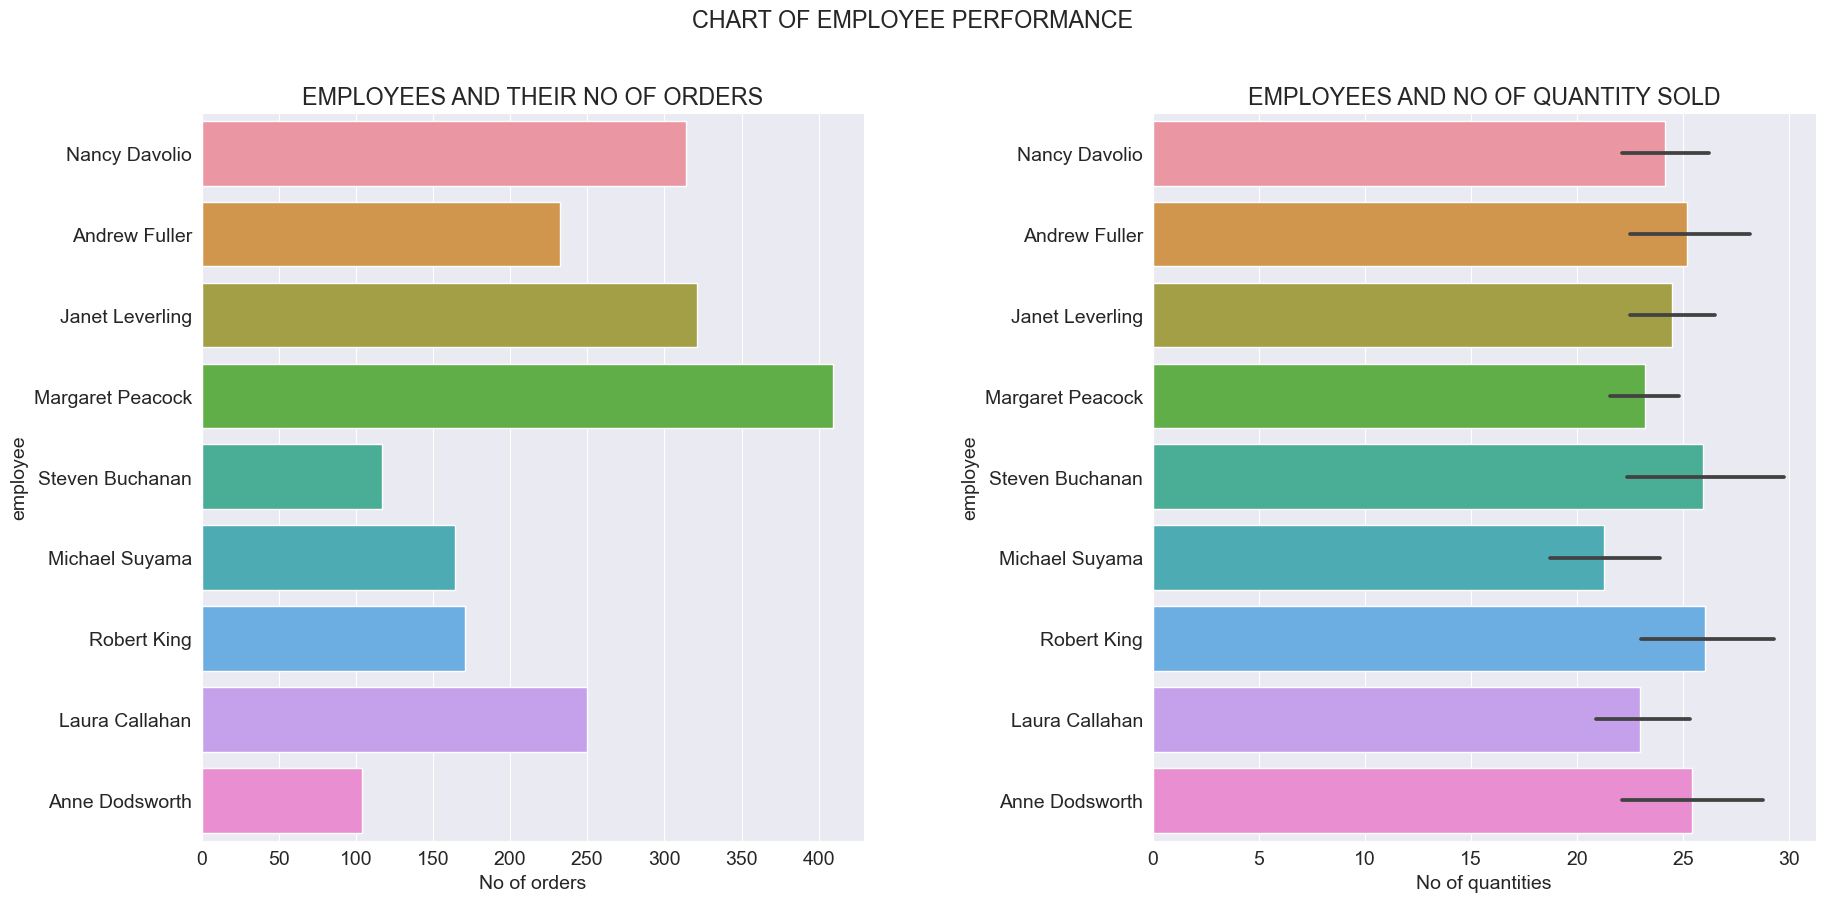

In [55]:
# subplots in seaborn

fig, ([ax1,ax2]) = plt.subplots(1,2, figsize = (20,10))

sns.countplot(data = orders_df, y = 'employee', ax = ax1)
sns.barplot(data = orders_df, y = 'employee', x = 'quantity', ax = ax2)

ax1.set_title('EMPLOYEES AND THEIR NO OF ORDERS')
ax2.set_title('EMPLOYEES AND NO OF QUANTITY SOLD')

ax1.set_xlabel('No of orders')
ax2.set_xlabel('No of quantities')

fig.tight_layout(pad = 5.0)

plt.suptitle('CHART OF EMPLOYEE PERFORMANCE')


Text(0.5, 0.98, 'NORMALITY AND OUTLIER INSPECTION IN ORDER VALUE AND QUANTITY')

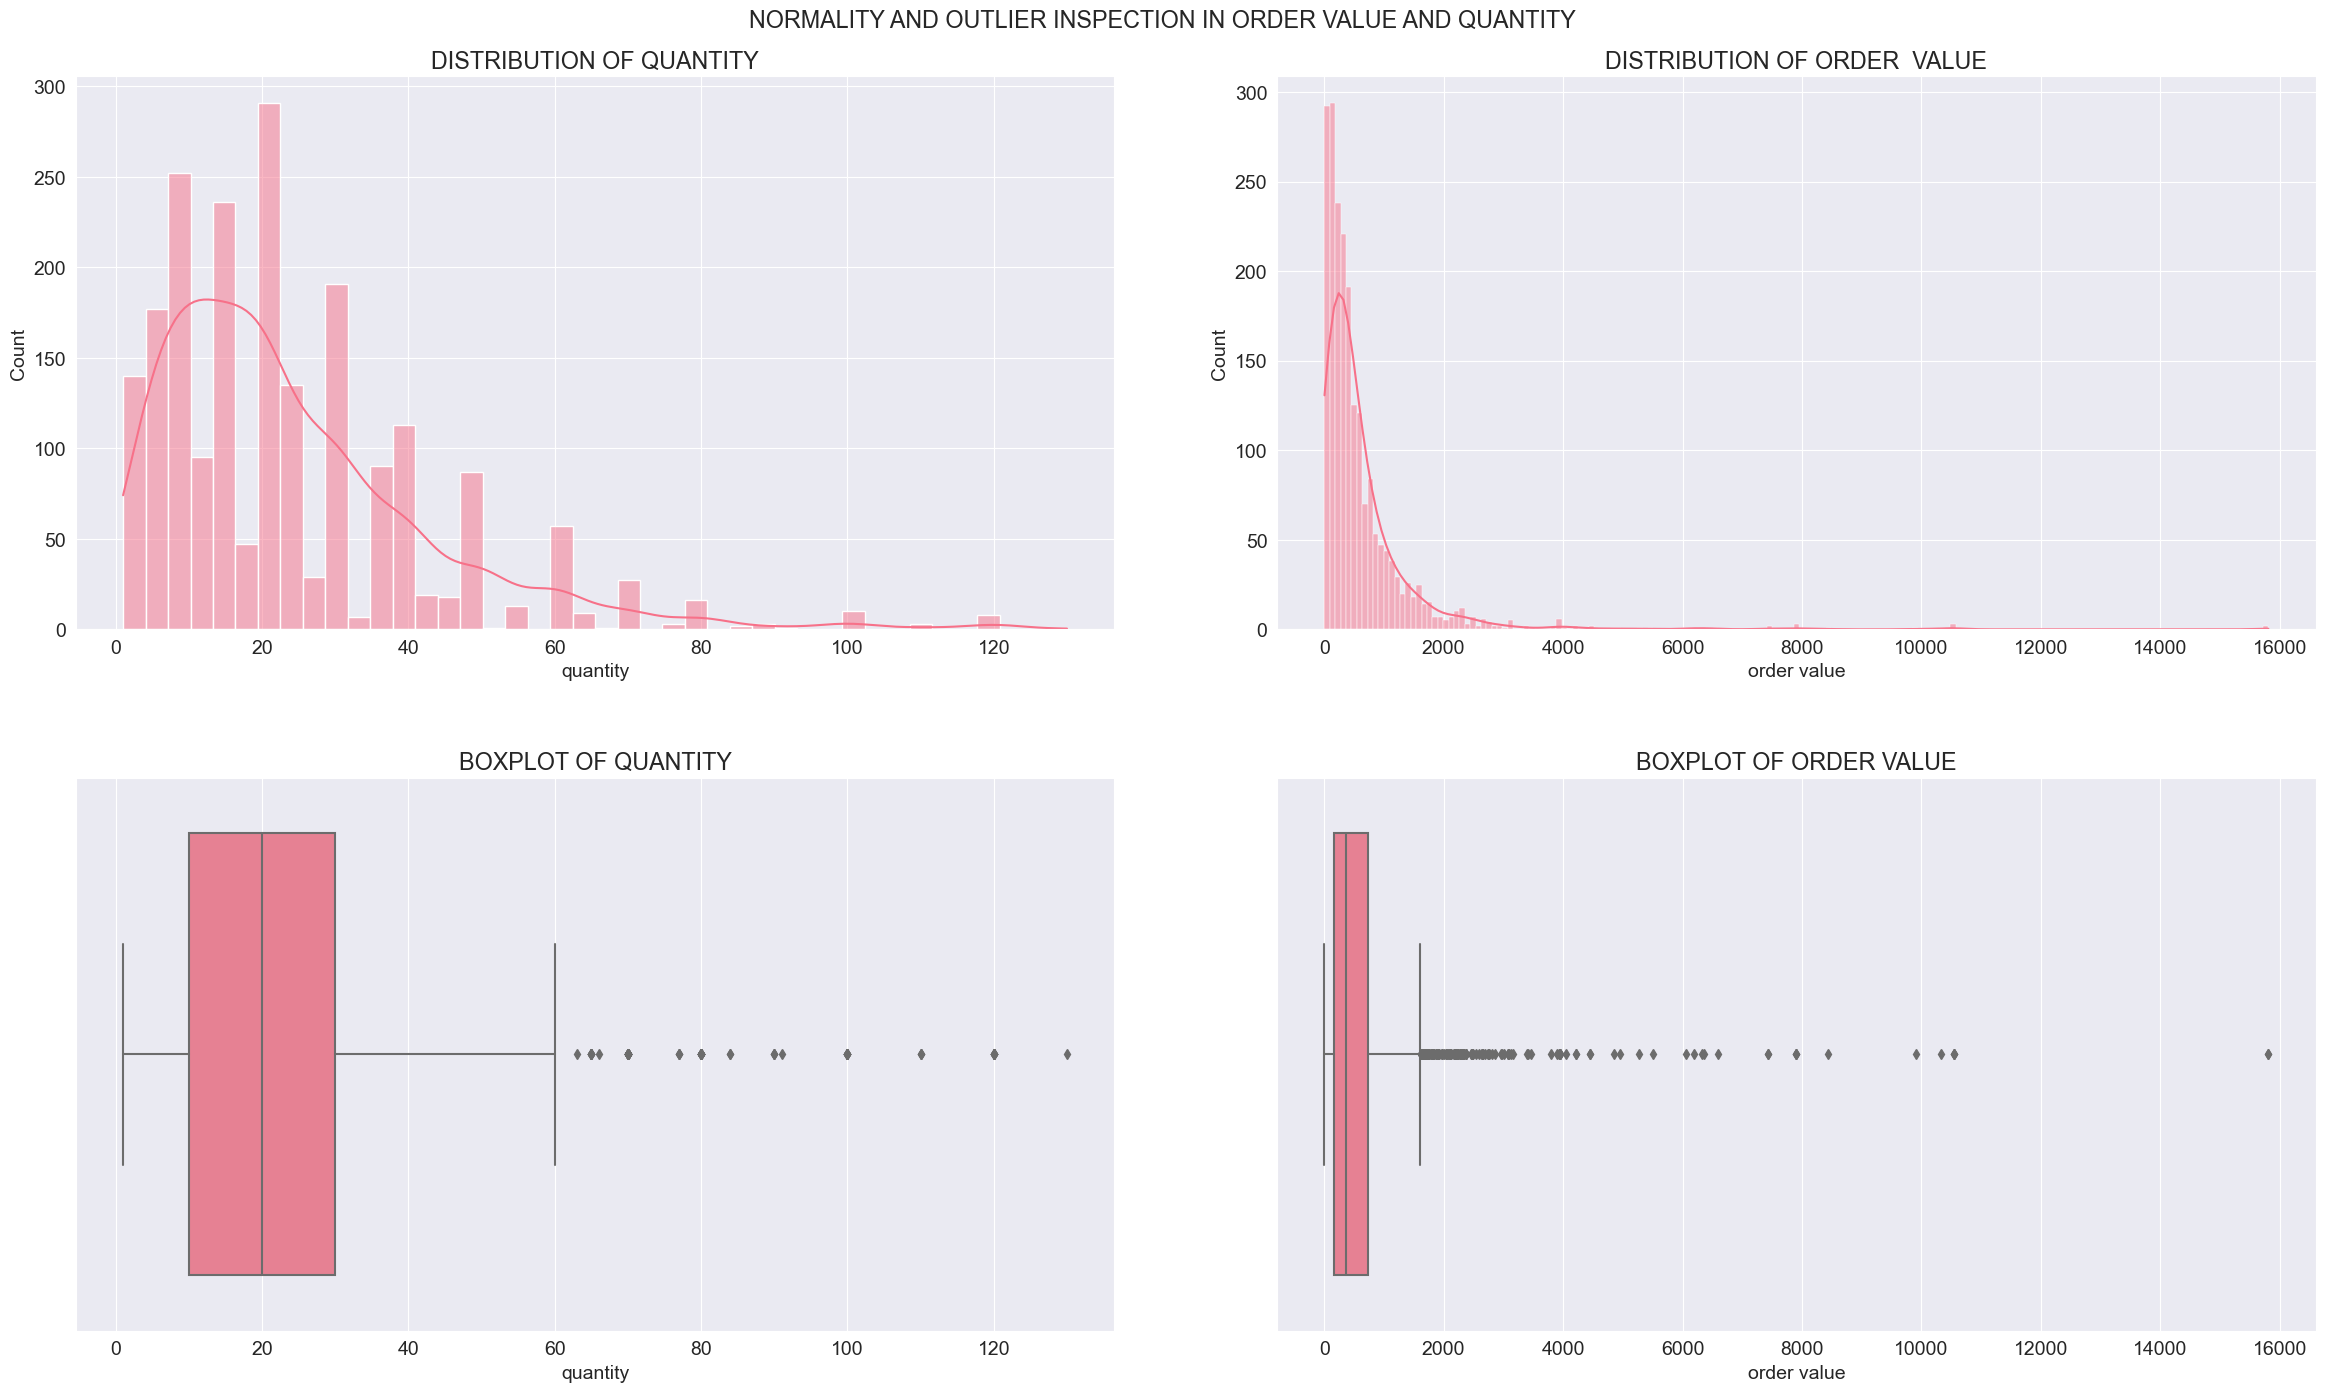

In [56]:
fig, axes = plt.subplots(2,2, figsize = (25,15))

sns.histplot(data = orders_df, x = 'quantity', kde = True, ax = axes[0,0])
sns.histplot(data = orders_df, x = 'order value', kde = True, ax = axes[0,1])
sns.boxplot(data = orders_df, x = 'quantity', ax = axes[1,0])
sns.boxplot(data = orders_df, x = 'order value', ax = axes[1,1])


fig.tight_layout(pad = 5.0)

axes[0,0].set_title('DISTRIBUTION OF QUANTITY')
axes[0,1].set_title('DISTRIBUTION OF ORDER  VALUE')
axes[1,0].set_title('BOXPLOT OF QUANTITY')
axes[1,1].set_title('BOXPLOT OF ORDER VALUE')

plt.suptitle('NORMALITY AND OUTLIER INSPECTION IN ORDER VALUE AND QUANTITY')

In [58]:
orders_df.to_csv('orders_data.csv')